<a href="https://colab.research.google.com/github/Ishan1923/Skin-Cancer-Detection-using-DL-techniques/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import glob
import seaborn as sns
import keras


In [3]:
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/skin-cancer9-classesisic


In [4]:
ISIC = os.path.join(dataset_path, "Skin cancer ISIC The International Skin Imaging Collaboration")
ISIC

'/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration'

In [5]:
train_test_folder = os.listdir(ISIC)
train_test_folder

['Test', 'Train']

In [6]:
img_dir_train = os.path.join(ISIC, "Train")
classes = os.listdir(img_dir_train)
print("total classes: ", len(classes))
classes

total classes:  9


['pigmented benign keratosis',
 'melanoma',
 'vascular lesion',
 'actinic keratosis',
 'squamous cell carcinoma',
 'basal cell carcinoma',
 'seborrheic keratosis',
 'dermatofibroma',
 'nevus']

In [7]:

img_addr_list = []
for i in range(len(classes)):
  temp = glob.glob(os.path.join(img_dir_train, classes[i], "*"))
  img_addr_list.append(temp)

total_images = 0;
for i in range(len(img_addr_list)):
  total_images += len(img_addr_list[i])

print("total images: ", total_images)

total images:  2239


In [8]:
img_dir_test = os.path.join(ISIC, "Test")
classes_test = os.listdir(img_dir_test)
img_addr_list_test= []
for i in range(len(classes_test)):
  temp = glob.glob(os.path.join(img_dir_test, classes_test[i], "*"))
  img_addr_list_test.append(temp)

total_images_test = 0;
for i in range(len(img_addr_list_test)):
  total_images_test += len(img_addr_list_test[i])

print("total images: ", total_images_test)

total images:  118


In [9]:
image_paths = []
labels = []
for i, class_list in enumerate(img_addr_list):
  for path in class_list:
    image_paths.append(path)
    labels.append(i)

df = pd.DataFrame({'image_path' : image_paths, 'labels' : labels})
df

,image_path,labels
0,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0
1,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0
2,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0
3,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0
4,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0
...,...,...
2234,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8
2235,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8
2236,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8
2237,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8


example address from df:  /kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0030882.jpg
image shape (450, 600, 3)


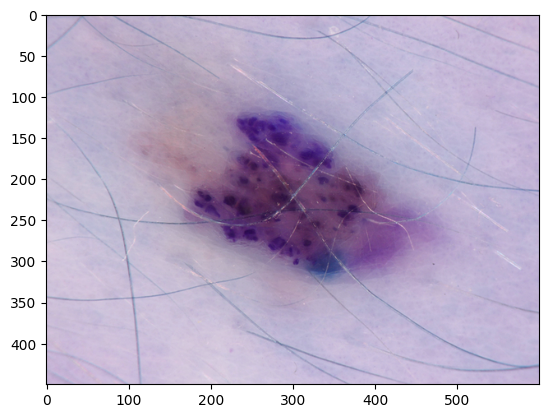

In [10]:
example_img = df.loc[1000, 'image_path']
print("example address from df: ", example_img)
example_img = cv2.imread(example_img)
print("image shape", example_img.shape)
plt.imshow(example_img)

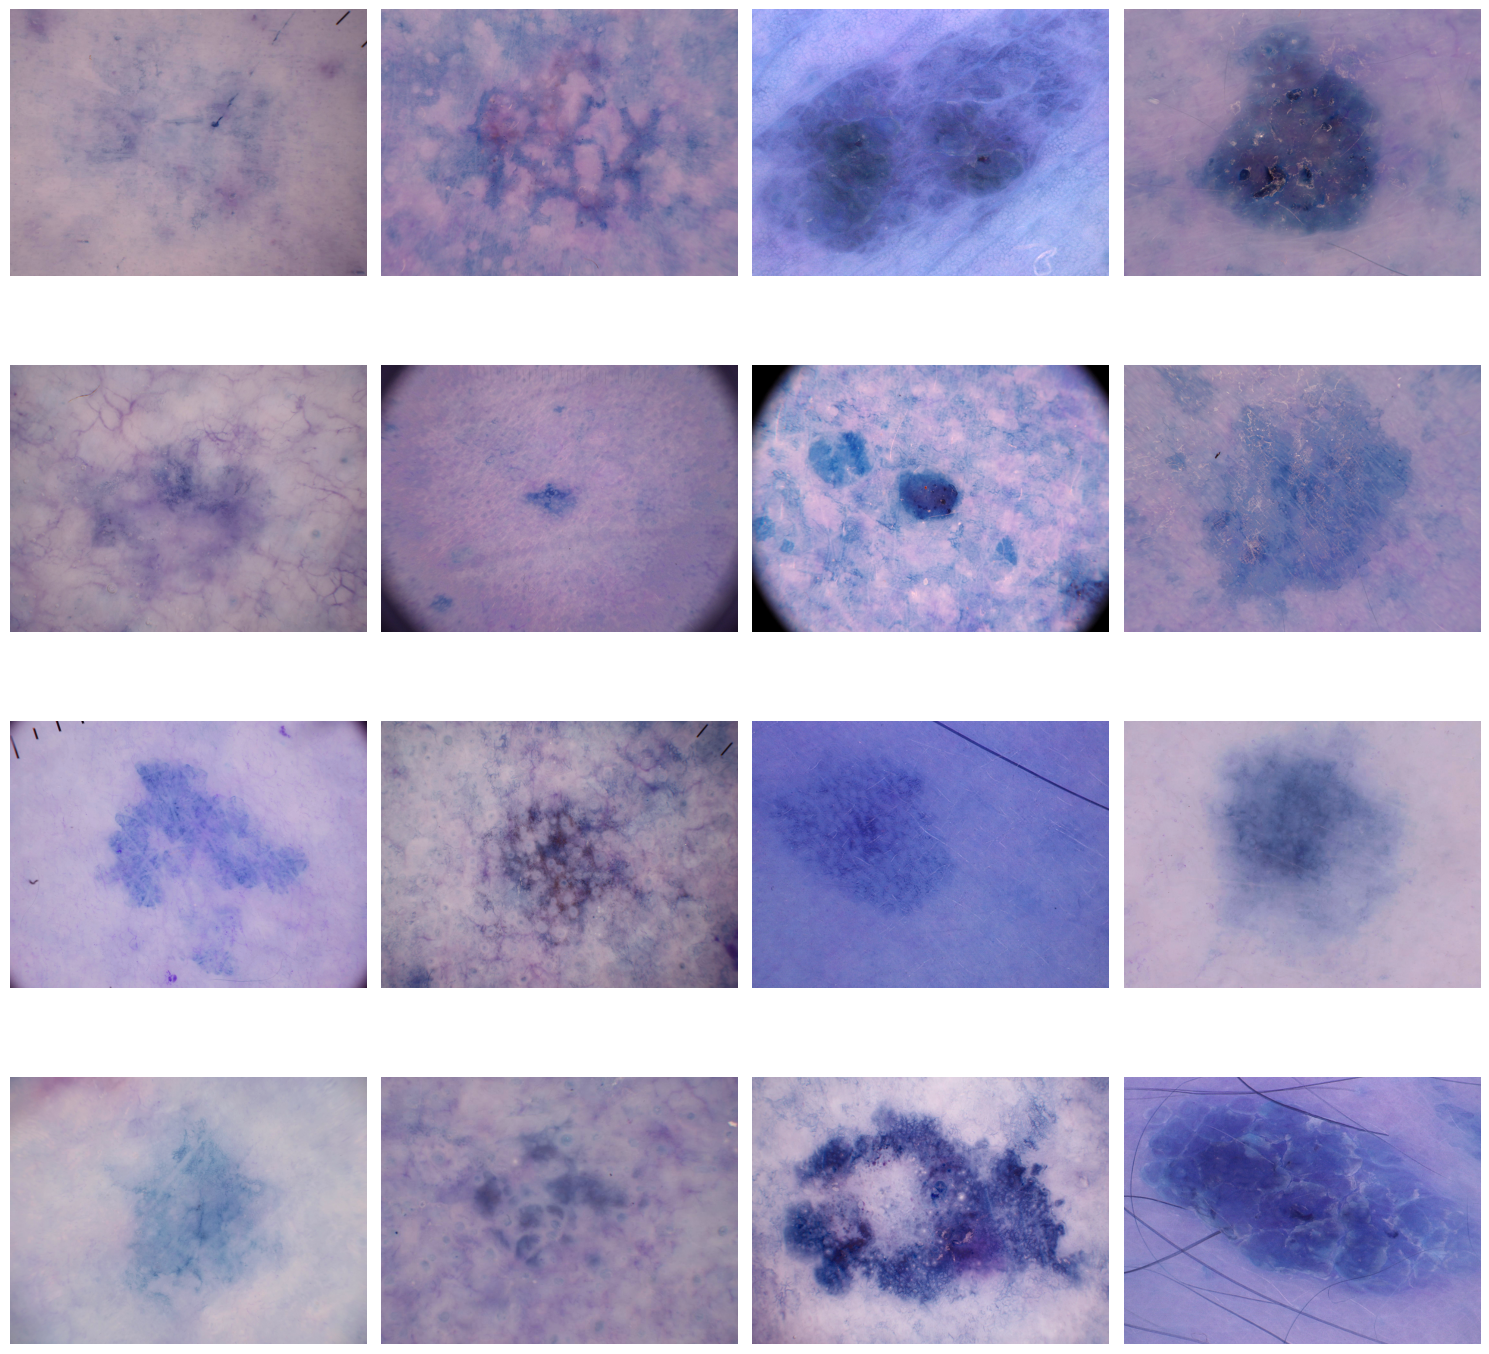

In [11]:
def plot_images(dataframe, rows = 4, cols = 4, x = 15, y = 15, n = 15):
  fig, ax = plt.subplots(rows, cols, figsize = (x, y))
  ax = ax.flatten()
  for i in range(len(dataframe.loc[0:n, 'image_path'])):
    image = cv2.imread(dataframe.loc[i, 'image_path'])
    ax[i].imshow(image)
    ax[i].axis('off')
  plt.tight_layout()
  plt.show()

plot_images(df)


In [15]:
image_val = []
for _, row in df.iterrows():
  image_val.append(cv2.imread(row['image_path']))
df['image_val'] = image_val

In [25]:
normalized_values = []
for i, row in df.iterrows():
  resized_image = cv2.resize(row['image_val'], (224, 224))
  rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  normalized_img = rgb_image / 255.0
  normalized_values.append(normalized_img)

df['normalized_values'] = normalized_values
df

,image_path,labels,image_val,normalized_values
0,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0,"[[[153, 134, 155], [153, 134, 155], [152, 133,...","[[[0.6078431372549019, 0.5254901960784314, 0.5..."
1,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0,"[[[162, 143, 176], [155, 139, 173], [154, 137,...","[[[0.6784313725490196, 0.5450980392156862, 0.6..."
2,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0,"[[[163, 172, 252], [161, 171, 249], [165, 170,...","[[[0.9568627450980393, 0.6666666666666666, 0.6..."
3,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0,"[[[154, 137, 171], [158, 141, 175], [160, 143,...","[[[0.6823529411764706, 0.5490196078431373, 0.6..."
4,/kaggle/input/skin-cancer9-classesisic/Skin ca...,0,"[[[135, 127, 144], [136, 127, 147], [135, 126,...","[[[0.5725490196078431, 0.49411764705882355, 0...."
...,...,...,...,...
2234,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8,"[[[41, 39, 45], [36, 34, 40], [42, 40, 46], [4...","[[[0.1803921568627451, 0.1450980392156863, 0.1..."
2235,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8,"[[[128, 114, 148], [129, 113, 147], [122, 104,...","[[[0.6039215686274509, 0.45098039215686275, 0...."
2236,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8,"[[[109, 124, 143], [110, 125, 144], [110, 125,...","[[[0.5686274509803921, 0.4980392156862745, 0.4..."
2237,/kaggle/input/skin-cancer9-classesisic/Skin ca...,8,"[[[34, 34, 46], [43, 40, 55], [44, 39, 54], [4...","[[[0.20392156862745098, 0.13725490196078433, 0..."


In [30]:
class TFPreprocessingPipiline:
  def __init__(self, img_size = (224,224), batch_size = 32):
    self.img_size = img_size
    self.batch_size = batch_size

  def preprocess_image(self, image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.decode_image(image, channels = 3)
    image = tf.reshape(image, [tf.shape(image)[0], tf.shape(image)[1], 3])
    image = tf.image.resize(image, self.img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

  def preprocess_with_augmentation(self, image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)


    k = tf.random.uniform([], 0, 4, tf.int32)
    image = tf.image.rot90(image, k)

    image = tf.clip_by_value(image, 0, 1)

    return image, label

  def create_dataset_from_directory(self, data_dir, validation_split = 0.2, subset = 'training', augment = True):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split = validation_split,
        subset = subset,
        seed = 42,
        image_size = self.img_size,
        batch_size = self.batch_size,
        label_mode = 'categorical'
    )

    if augment and subset == 'training':
      dataset = dataset.map(self.apply_augmentation_to_batch, num_paraller_calls = tf.data.AUTOTUNE)

    dataset = dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y), num_parallel_calls = tf.data.AUTOTUNE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

  def apply_augmentation_to_batch(self, images, labels):
    augmented_images = tf.map_fn(
        lambda img: self.augment_single_image(img),
        images,
        parallel_iterations = 10,
        dtype = tf.float32
    )
    return augmented_images, labels

  def augmentetd_single_images(self, images):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image

  def create_dataset_from_paths_and_labels(self, image_paths, labels, augment = True):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

    if augment :
      dataset = dataset.map(self.preprocess_with_augmentation, num_parallel_calls = tf.data.AUTOTUNE)
    else:
      dataset = dataset.map(self.preprocess_image, num_parallel_calls = tf.data.AUTOTUNE)

    dataset = dataset.shuffle(buffer_size = 1000)
    dataset = dataset.batch(self.batch_size)
    dataset = dataset.cache()
    dataset = dataset.prefecth(tf.data.AUTOTUNE)

    return dataset

  def create_dataset_for_prediction(self, image_paths):
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(
        lambda path : self.preprocess_image_only(path),
        num_parallel_calls = tf.data.AUTOTUNE
        )

    dataset = dataset.batch(self.batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

  def preprocess_image_only(self, image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels = 3)
    image = tf.reshape(image, [tf.shape(image)[0], tf.shape(image)[1], 3])
    image = tf.image.resize(image, self.img_size)
    image = tf.image.resize(image, self.img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

  def visualize_batch(self, dataset, num_images = 9):
    import matplotlib.pyplot as plt

    for images, labels in dataset.take(1):
      fig, ax = plt.subplots(3,3, figsize = (10,10))
      ax = ax.ravel()

      for i in range (min(num_images, len(num_images))):
        img = images[i].numpy()
        ax[i].imshow(img)
        ax[i].set_title(f"Label: {labels[i].numpy().argmax()}")
        ax[i].axis('off')

      plt.tight_layout()
      plt.show()
      break



In [32]:
pipeline = TFPreprocessingPipiline(img_size=(224, 224), batch_size = 32)

dataset = pipeline.create_dataset_from_paths_and_labels(image_paths, labels)

print(f"dataset: {dataset}")

ValueError: in user code:

    File "/tmp/ipython-input-30-2517618951.py", line 15, in preprocess_with_augmentation  *
        image = tf.image.random_flip_left_right(image)

    ValueError: 'image' (shape ()) must be at least three-dimensional.


In [11]:
# taken from https://keras.io/examples/keras_recipes/creating_tfrecords/

IMG_CHANNELS = 3

def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(value).numpy()])
    )


def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def float_feature_list(value):
    """Returns a list of float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def read_and_decode(filename):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return img

def create_tfrecord(filename, label_int):
    img = read_and_decode(filename)                   # Tensor (H, W, 3)
    dims = img.shape                                   # TensorShape
    height, width, channels = dims[0], dims[1], dims[2]

    img = tf.reshape(img, [-1])                        # Tensor (H*W*3,)
    img = img.numpy().tolist()                         # Convert to flat list of floats

    return tf.train.Example(features=tf.train.Features(feature={
        'image': float_feature_list(img),              # ✅ Proper float list
        'height': int64_feature(height),
        'width': int64_feature(width),
        'channels': int64_feature(channels),
        'label': int64_feature(label_int)
    }))


In [12]:
# !pip install pandas-tfrecords

In [13]:
# with beam.Pipeline() as p:
#   (p
#    | 'input' >> beam.Create(train.values)
#    | 'create_tfr' >> beam.Map(lambda x: createq_tfrecord(x[0], x[1], LABELS.index(x[1])))
#    | 'write' >> beam.io.tfrecordio.WriteToTFRecord('output/train', file_name_suffix = '.gz')
#   )

In [14]:
# from pandas_tfrecords import pd2tf

# img_tfr = pd2tf(df, './tfrecorder')
# print(img_tfr)

In [15]:
def write_tfrecord_from_df(df, tfrecord_path):
  with tf.io.TFRecordWriter(tfrecord_path) as writer:
    for _, row in df.iterrows():
      try:
        image_path = row['image_path']
        label = row['labels']
        example = create_tfrecord(image_path, label)
        writer.write(example.SerializeToString())
      except Exception as e:
        print(f"Skipping {row['image_path']} due to error: {e}")

In [39]:
write_tfrecord_from_df(df, './tfrecord_')

In [16]:
from google.colab import drive
drive.mount('/content/drive')
tfrecord_path = "/content/drive/MyDrive/dara_preprocessing/tfrecorder"
tfrecorder_filename = "image_data.tfrecord"
tfrecord_path = os.path.join(tfrecord_path, tfrecorder_filename)
write_tfrecord_from_df(df, tfrecord_path)

MessageError: Error: credential propagation was unsuccessful

In [30]:
## creating feature description
feature_description={
        'image': tf.io.FixedLenFeature([], tf.float32),
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'channels': tf.io.FixedLenFeature([], tf.int64),
        'label': tf.io.FixedLenFeature([], tf.int64),
    }

In [31]:
#creating a parsing function which resizes and normalizes the image (not images)
def _parse_function(exp):
  parsed_example = tf.io.parse_single_example(exp, feature_description)
  image = parsed_example['image']

  label = tf.cast(parsed_example['label'], tf.int32)
  height = parsed_example['height']
  width = parsed_example['width']
  channels = parsed_example['channels']

  image = tf.reshape(image, [height, width, channels])
  image = tf.image.resize(image, [224, 224])
  image = tf.cast(image, tf.float32) / 255.0

  return (image, height, width, channels, label)

In [32]:
from google.colab import drive
drive.mount('/content.drive')
raw_dataset = tf.data.TFRecordDataset('/content/drive/MyDrive/dara_preprocessing/tfrecorder/image_data.tfrecord') # --> getting raw dataset from the saved folder
parsed_dataset = raw_dataset.map(_parse_function) #---> parsing with the previously defined parsing function

Drive already mounted at /content.drive; to attempt to forcibly remount, call drive.mount("/content.drive", force_remount=True).


In [33]:
parsed_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [34]:
final_dataset = parsed_dataset.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE) #--> final dataset, with batch inputs for better efficinecy

In [35]:
final_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
raw_dataset = tf.data.TFRecordDataset('/content/drive/MyDrive/dara_preprocessing/tfrecorder/image_data.tfrecord')

In [38]:
for raw_record in raw_dataset:
  example = _parse_function(raw_record)

  image = tf.io.decode_jpeg(example[0])
  height = example['height'].numpy()
  width = example['width'].numpy()
  channels = example['channels'].numpy()
  label = example['label'].numpy()

  print(image.shape, height, width, channels, label)


NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/drive/MyDrive/dara_preprocessing/tfrecorder/image_data.tfrecord; No such file or directory [Op:IteratorGetNext] name: 

In [ ]:
#example of how to implement a simple model; taken from :   https://keras.io/examples/keras_recipes/creating_tfrecords/#train-a-simple-model-using-the-generated-tfrecords

def prepare_sample(image, height, width, channels, label):
    image = keras.ops.image.resize(image, size=(224, 224))
    return image, label


def get_dataset(filenames, batch_size):
    dataset = (
        tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
        .map(_parse_function, num_parallel_calls=AUTOTUNE)
        .map(prepare_sample, num_parallel_calls=AUTOTUNE)
        .shuffle(batch_size * 10)
        .batch(batch_size)
        .prefetch(AUTOTUNE)
    )
    return dataset


train_filenames = tf.io.gfile.glob(f"{'/content/drive/MyDrive/dara_preprocessing/tfrecorder/image_data.tfrecord'}/*.tfrec")
batch_size = 32
epochs = 1
steps_per_epoch = 50
AUTOTUNE = tf.data.AUTOTUNE

input_tensor = keras.layers.Input(shape=(224, 224, 3), name="image")
model = keras.applications.EfficientNetB0(
    input_tensor=input_tensor, weights=None, classes=91
)


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


model.fit(
    x=get_dataset(train_filenames, batch_size),
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    verbose=1,
)


ValueError: in user code:

    File "/tmp/ipython-input-35-1783773297.py", line 4, in prepare_sample  *
        image = keras.ops.image.resize(image, size=(224, 224))
    File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/image.py", line 344, in resize  **
        raise ValueError(

    ValueError: Invalid images rank: expected rank 3 (single image) or rank 4 (batch of images). Received input with shape: images.shape=(None,)
